# Disabled non-workers by type of disability and sex, age and sex, 2011 - GOA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns

In [2]:
res = requests.get('https://api.data.gov.in/resource/4514b289-b939-4589-bba9-d75d519e1c5d?api-key=579b464db66ec23bdd000001cdd3946e44ce4aad7209ff7b23ac571b&format=json')

In [3]:
df = pd.DataFrame(res.json()['records'])

In [60]:
df.tail()

,table_name,state_code,district_code,area_name,total__rural_urban,activity_of_non_worker,total_disabled_non_worker___persons,total_disabled_non_worker___male,total_disabled_non_worker___female,type_of_disability___in_seeing___persons,...,type_of_disability___mental_retardation___female,type_of_disability___mental_illness___persons,type_of_disability___mental_illness___male,type_of_disability___mental_illness___female,type_of_disability___any_other___persons,type_of_disability___any_other___male,type_of_disability___any_other___female,type_of_disability___multiple_disability___persons,type_of_disability___multiple_disability___male,type_of_disability___multiple_disability___female
5,C2324,30,00,State - GOA (30),Total,Rentier,156,114,42,33,...,0,3,2,1,20,13,7,4,4,0
6,C2324,30,00,State - GOA (30),Total,"Beggar, Vagrants,etc.",39,24,15,2,...,0,9,4,5,4,2,2,6,4,2
7,C2324,30,00,State - GOA (30),Total,Others,1934,1035,899,248,...,32,133,85,48,395,180,215,127,72,55
8,C2324,30,00,State - GOA (30),Rural,Total,10556,4607,5949,1649,...,339,674,339,335,1754,753,1001,1046,478,568
9,C2324,30,00,State - GOA (30),Rural,Student,1878,1017,861,227,...,105,58,37,21,417,225,192,117,67,50


In [58]:
df.columns

Index(['table_name', 'state_code', 'district_code', 'area_name',
       'total__rural_urban', 'activity_of_non_worker',
       'total_disabled_non_worker___persons',
       'total_disabled_non_worker___male',
       'total_disabled_non_worker___female',
       'type_of_disability___in_seeing___persons',
       'type_of_disability___in_seeing___male',
       'type_of_disability___in_seeing___female',
       'type_of_disability___in_hearing___persons',
       'type_of_disability___in_hearing___male',
       'type_of_disability___in_hearing___female',
       'type_of_disability___in_speech___persons',
       'type_of_disability___in_speech___male',
       'type_of_disability___in_speech___female',
       'type_of_disability___in_movement___persons',
       'type_of_disability___in_movement___male',
       'type_of_disability___in_movement___female',
       'type_of_disability___mental_retardation___persons',
       'type_of_disability___mental_retardation___male',
       'type_of_disabili

In [59]:
df[['total_disabled_non_worker___female']].value_counts()

total_disabled_non_worker___female
15                                    1
42                                    1
857                                   1
861                                   1
899                                   1
2080                                  1
4164                                  1
5193                                  1
5949                                  1
13250                                 1
dtype: int64

In [6]:
total_disabled_non_workers = df.iloc[:,6]
total_disabled_non_workers_male = df.iloc[:,7]
total_disabled_non_workers_female = df.iloc[:,8]

for i in range(len(total_disabled_non_workers)):
    total_disabled_non_workers[i] = int(total_disabled_non_workers[i])
    total_disabled_non_workers_male[i] = int(total_disabled_non_workers_male[i])
    total_disabled_non_workers_male[i] = int(total_disabled_non_workers_male[i])
    
total_disabled_non_workers = total_disabled_non_workers.sum()
total_disabled_non_workers_male = total_disabled_non_workers_male.sum()
total_disabled_non_workers_female = total_disabled_non_workers_female.sum()
    

/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/2262252625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_disabled_non_workers[i] = int(total_disabled_non_workers[i])
/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/2262252625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_disabled_non_workers_male[i] = int(total_disabled_non_workers_male[i])
/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/2262252625.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [43]:
seeing_male = df.iloc[:,10].sum()
hearing_male = df.iloc[:,13].sum()
speech_male = df.iloc[:,16]
movement_male = df.iloc[:,19].sum()
mental_retardation_male = df.iloc[:,22].sum()
mental_illness_male = df.iloc[:,25].sum()
any_other_disability_male = df.iloc[:,28].sum()
multiple_disability_male = df.iloc[:,31].sum()

for i in range(len(speech_male)):
    speech_male[i] = int(speech_male[i])
    
speech_male = speech_male.sum()


seeing_female = df.iloc[:,11].sum()
hearing_female = df.iloc[:,14].sum()
speech_female = df.iloc[:,16]
movement_female = df.iloc[:,20].sum()
mental_retardation_female = df.iloc[:,23]
mental_illness_female = df.iloc[:,26].sum()
any_other_disability_female = df.iloc[:,29].sum()
multiple_disability_female = df.iloc[:,32]

for i in range(len(speech_female)):
    speech_female[i] = int(speech_female[i])
    mental_retardation_female[i] = int(mental_retardation_female[i])
    multiple_disability_female[i] = int(multiple_disability_female[i])
    

speech_female = speech_female.sum()
mental_retardation_female = mental_retardation_female.sum()
multiple_disability_female = multiple_disability_female.sum()
    

/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/882069473.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_male[i] = int(speech_male[i])
/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/882069473.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speech_female[i] = int(speech_female[i])
/var/folders/mn/2fq53rh93k35kvpbj6_bh43c0000gn/T/ipykernel_1004/882069473.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

# Plotting the disability bar chart among male and female persons

In [44]:
disability_types = ['seeing','hearing','speech','movement','mental_retardation','mental_illness','others','multiple_disability']

In [45]:
disability_male = [seeing_male,hearing_male,speech_male,movement_male,mental_retardation_male,mental_illness_male,any_other_disability_male,multiple_disability_male]
disability_female = [seeing_female,hearing_female,speech_female,movement_female,mental_retardation_female,mental_illness_female,any_other_disability_female,multiple_disability_female]

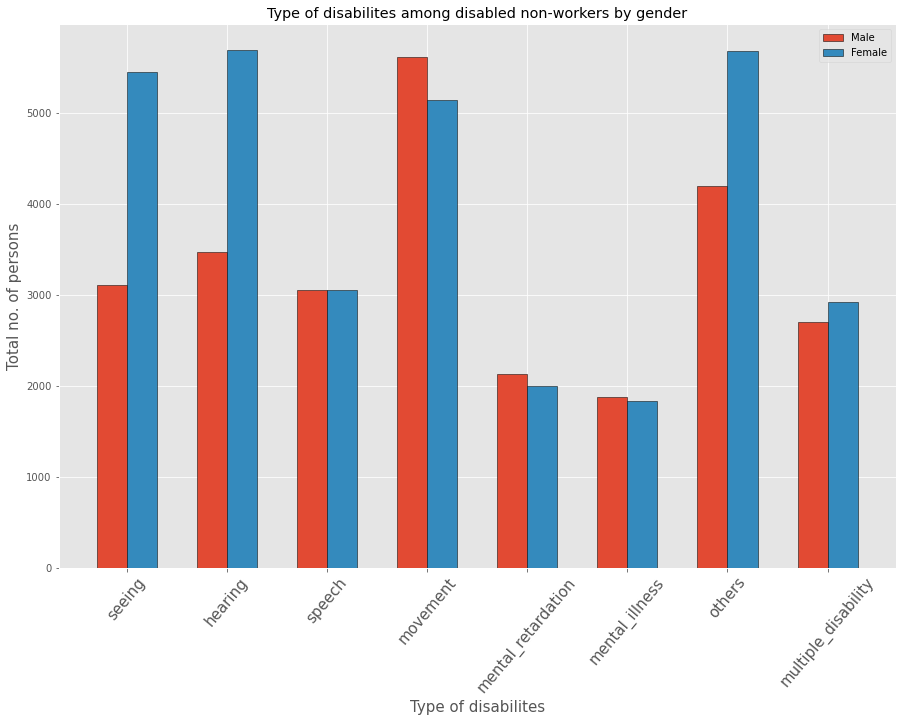

In [46]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
plt.title('Type of disabilites among disabled non-workers by gender')
plt.xlabel('Type of disabilites',fontsize=15)
plt.ylabel('Total no. of persons',fontsize=15)
width = 0.3
bar1 = np.arange(len(disability_types))
bar2 = [i+width for i in bar1]
plt.bar(bar1,disability_male,width,edgecolor='black',label='Male')
plt.bar(bar2,disability_female,width,edgecolor='black',label='Female')
plt.xticks(bar1+width/2,disability_types,rotation = 50,fontsize=15)
plt.legend()
plt.show()

# Inference from the bar chart 

In the above bar chart obtained,it is noticeable that except the disabilites in speech,movement,mental retardation,mental illness,others and nultiple disability other two types of disabilites seeing and hearing in male and female has uneven kind of distribution.It is quite significant from the above data that majority of seeing and hearing disability has a higher chances of occuring in female persons as compared to male.There is a higher spike in the bar graphs in case of female coloured blue than males.

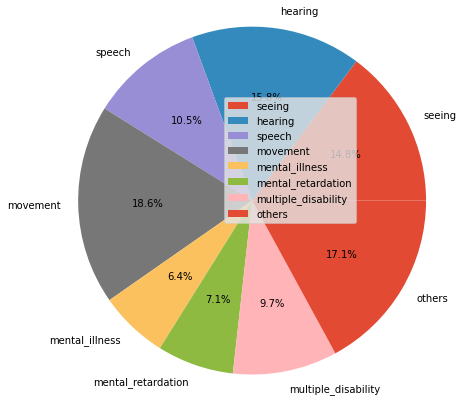

In [47]:
total_seeing_disability = seeing_male + seeing_female
total_hearing_disability = hearing_male + hearing_female
total_speech_disability = speech_male + speech_female
total_movement_disability = movement_male + movement_female
total_mental_illness_disability = mental_illness_male + mental_illness_female
total_mental_retardation_disability = mental_retardation_male + mental_retardation_female
total_multiple_disability_disability = multiple_disability_male + multiple_disability_female
total_any_other_disability = any_other_disability_male + any_other_disability_female

total_disabilities = [ total_seeing_disability,
                       total_hearing_disability,
                       total_speech_disability,
                       total_movement_disability,
                       total_mental_illness_disability,
                       total_mental_retardation_disability,
                       total_multiple_disability_disability,
                       total_any_other_disability
                     ]
labels = [ 'seeing',
           'hearing',
           'speech',
           'movement',
           'mental_illness',
           'mental_retardation',
           'multiple_disability',
           'others'
         ]
plt.pie(total_disabilities, labels = labels,autopct = '%0.1f%%',radius = 2)
plt.legend(loc = 0)
plt.show()

In [56]:
!pip install outlier_utils


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# Some important metrices observed from the data 

In [8]:
total_disabled_non_workers_male

26138

In [9]:
total_disabled_non_workers_female

33310

In [10]:
male_disability_ratio = total_disabled_non_workers_male/total_disabled_non_workers
female_disability_ratio = total_disabled_non_workers_female/total_disabled_non_workers
male_female_ratio = total_disabled_non_workers_male/total_disabled_non_workers_female

In [11]:
male_disability_ratio

0.4396783743776073

In [12]:
female_disability_ratio

0.5603216256223926

In [13]:
male_female_ratio

0.7846892824977484

From the male_disability_ratio and female_disability_ratio it is observed that females have higher chances of progressing disabilites than in case of male persons.

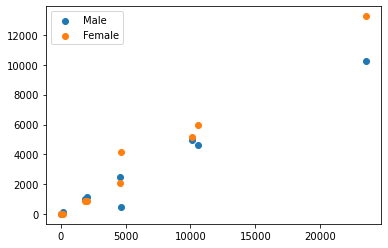

In [14]:
plt.scatter(x=df[['total_disabled_non_worker___persons']],y=df[['total_disabled_non_worker___male']],label='Male')
plt.scatter(x=df[['total_disabled_non_worker___persons']],y=df[['total_disabled_non_worker___female']],label='Female')
plt.legend()

In [15]:
from scipy.stats import f_oneway

In [16]:
anova_seeing = f_oneway(df['type_of_disability___in_seeing___male'],df['type_of_disability___in_seeing___female'])

In [17]:
anova_hearing = f_oneway(df['type_of_disability___in_hearing___male'],df['type_of_disability___in_hearing___female'])

In [18]:
anova_speech = f_oneway(df['type_of_disability___in_speech___male'],df['type_of_disability___in_speech___female'])

In [19]:
anova_movement = f_oneway(df['type_of_disability___in_movement___male'],df['type_of_disability___in_movement___female'])

In [20]:
anova_mental_retardation = f_oneway(df['type_of_disability___mental_retardation___male'],df['type_of_disability___mental_retardation___female'])

In [21]:
anova_mental_illness = f_oneway(df['type_of_disability___mental_illness___male'],df['type_of_disability___mental_illness___female'])

In [22]:
anova_seeing,anova_hearing,anova_speech,anova_movement,anova_mental_retardation,anova_mental_illness

(F_onewayResult(statistic=0.9306460049070704, pvalue=0.34747799695145176),
 F_onewayResult(statistic=0.7497544465175949, pvalue=0.39794868635220126),
 F_onewayResult(statistic=0.5460819723457263, pvalue=0.46945047708980914),
 F_onewayResult(statistic=0.022059279439421264, pvalue=0.8835807579535783),
 F_onewayResult(statistic=0.012320530882552522, pvalue=0.9128463317890382),
 F_onewayResult(statistic=0.0015147900680403642, pvalue=0.969382354572429))

In [23]:
from scipy.stats import pearsonr

In [44]:
corr, _ = pearsonr(df['total_disabled_non_worker___male'],df['total_disabled_non_worker___female'])

In [45]:
corr

0.9477864384235251

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_disabled_non_worker___persons', ylabel='type_of_disability___in_seeing___persons'>

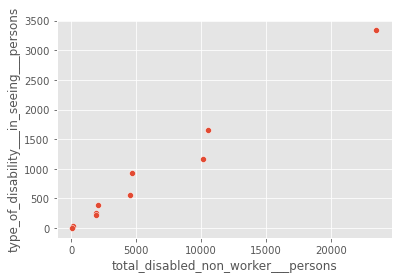

In [49]:
sns.scatterplot(df['total_disabled_non_worker___persons'],df['type_of_disability___in_seeing___persons'],data = df)